# Dataset Statistics

In [1]:
import csv
import os
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

from arclus.settings import PREP_ASSIGNMENTS, PREP_PREMISES, PREP_CLAIMS

----------------------------
## Fetch data 
----------------------------

In [2]:
premises_df = pd.read_csv(PREP_PREMISES, delimiter=",")
claims_df = pd.read_csv(PREP_CLAIMS, delimiter=",")
ass_df = pd.read_csv(PREP_ASSIGNMENTS, delimiter=",")

#### Claims
* add col for number of chars in claim_text
* add col for number of words in claim_text

In [3]:
claims_df["claims_n_words"] = claims_df['claim_text'].str.split().str.len()
claims_df["claims_n_chars"] = claims_df['claim_text'].str.len()
claims_df

,Unnamed: 0,claim_id,claim_text,source,claims_n_words,claims_n_chars
0,0,0,Denying smokers access to Medicare_it would be...,DebatePediaOrg,14,84
1,1,1,Pros and cons of drinking beer_Availability: I...,DebatePediaOrg,10,70
2,2,2,Pros and cons of drinking beer_Social aspects:...,DebatePediaOrg,12,84
3,3,3,Pros and cons of drinking beer_Write Subquesti...,DebatePediaOrg,8,56
4,4,4,Education vouchers_Choice: Do vouchers introdu...,DebatePediaOrg,9,80
...,...,...,...,...,...,...
53370,450,53370,This House would ban partial birth abortions,iDebateOrg,7,44
53371,451,53371,This house believes NAFTA has benefitted all p...,iDebateOrg,9,62
53372,452,53372,This House would cede control of the Falkland ...,iDebateOrg,12,78
53373,453,53373,"This House would force the media to display, p...",iDebateOrg,17,101


#### Premises
* add col for number of chars in premise_text
* add col for number of words in premise_text

In [4]:
premises_df["premises_n_words"] = premises_df['premise_text'].str.split().str.len()
premises_df["premises_n_chars"] = premises_df['premise_text'].str.len()
premises_df

,Unnamed: 0,premise_id,premise_text,source,premises_n_words,premises_n_chars
0,0,0,The government should be holding people's heal...,DebatePediaOrg,41.0,241.0
1,1,1,Beer is probably the most available beverage,DebatePediaOrg,7.0,44.0
2,2,2,Beer is unavailable for minors - In most count...,DebatePediaOrg,45.0,275.0
3,3,3,Drinking beer together can help to break barri...,DebatePediaOrg,29.0,204.0
4,4,4,Drinking beer can lead to socially erratic beh...,DebatePediaOrg,34.0,215.0
...,...,...,...,...,...,...
698657,3345,698657,Trials help bring divisions into the open to h...,iDebateOrg,11.0,60.0
698658,3346,698658,The scale of crimes being prosecuted cause ver...,iDebateOrg,304.0,2170.0
698659,3347,698659,These trials are not always in the best intere...,iDebateOrg,113.0,1101.0
698660,3348,698660,While proposition may claim that prosecution o...,iDebateOrg,147.0,1700.0


* some premises have no text

In [5]:
premises_df[premises_df["premise_text"].isnull()]

,Unnamed: 0,premise_id,premise_text,source,premises_n_words,premises_n_chars
4705,4705,4705,NaN,DebatePediaOrg,NaN,NaN
678428,9798,678428,NaN,debatewise,NaN,NaN
681204,12574,681204,NaN,debatewise,NaN,NaN
681205,12575,681205,NaN,debatewise,NaN,NaN
681206,12576,681206,NaN,debatewise,NaN,NaN
686327,17697,686327,NaN,debatewise,NaN,NaN
686328,17698,686328,NaN,debatewise,NaN,NaN
686329,17699,686329,NaN,debatewise,NaN,NaN
686331,17701,686331,NaN,debatewise,NaN,NaN
686334,17704,686334,NaN,debatewise,NaN,NaN


In [6]:
premises_df = premises_df[premises_df['premise_text'].notna()]

#### Assignments

In [7]:
ass_df

,Unnamed: 0,claim_id,premise_id
0,0,0,0
1,1,1,1
2,2,1,2
3,3,2,3
4,4,2,4
...,...,...,...
698657,3345,53374,698657
698658,3346,53374,698658
698659,3347,53374,698659
698660,3348,53374,698660


#### Extended Assignments

In [8]:
ass_extended = pd.merge(ass_df, premises_df, how='inner', on="premise_id")
ass_extended = pd.merge(ass_extended, claims_df, how='inner', on="claim_id")
ass_extended = ass_extended.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', "Unnamed: 0"])
ass_extended

,claim_id,premise_id,premise_text,source_x,premises_n_words,premises_n_chars,claim_text,source_y,claims_n_words,claims_n_chars
0,0,0,The government should be holding people's heal...,DebatePediaOrg,41.0,241.0,Denying smokers access to Medicare_it would be...,DebatePediaOrg,14,84
1,1,1,Beer is probably the most available beverage,DebatePediaOrg,7.0,44.0,Pros and cons of drinking beer_Availability: I...,DebatePediaOrg,10,70
2,1,2,Beer is unavailable for minors - In most count...,DebatePediaOrg,45.0,275.0,Pros and cons of drinking beer_Availability: I...,DebatePediaOrg,10,70
3,2,3,Drinking beer together can help to break barri...,DebatePediaOrg,29.0,204.0,Pros and cons of drinking beer_Social aspects:...,DebatePediaOrg,12,84
4,2,4,Drinking beer can lead to socially erratic beh...,DebatePediaOrg,34.0,215.0,Pros and cons of drinking beer_Social aspects:...,DebatePediaOrg,12,84
...,...,...,...,...,...,...,...,...,...,...
698644,53374,698657,Trials help bring divisions into the open to h...,iDebateOrg,11.0,60.0,This House would prosecute war criminals,iDebateOrg,6,40
698645,53374,698658,The scale of crimes being prosecuted cause ver...,iDebateOrg,304.0,2170.0,This House would prosecute war criminals,iDebateOrg,6,40
698646,53374,698659,These trials are not always in the best intere...,iDebateOrg,113.0,1101.0,This House would prosecute war criminals,iDebateOrg,6,40
698647,53374,698660,While proposition may claim that prosecution o...,iDebateOrg,147.0,1700.0,This House would prosecute war criminals,iDebateOrg,6,40


----------------------------
## Statistics
-----------------------------

#### Duplicate claims (grouped by **claim_text**)

In [9]:
gb_claim_text = claims_df.groupby(['claim_text']).count().sort_values("claim_id", ascending=False)
duplicate_claims = gb_claim_text[gb_claim_text['claim_id']>1]
duplicate_claims

,Unnamed: 0,claim_id,source,claims_n_words,claims_n_chars
claim_text,,,,,
Minority schools_,5,5,5,5,5
Prosecuting Sudan President Omar al-Bashir for war crimes_Write Subquestion here...,4,4,4,4,4
Russian membership in the WTO_Write Subquestion here...,3,3,3,3,3
Israeli military assault in Gaza_Ceasefire: Is Hamas to blame for breaking the cease-fire?,3,3,3,3,3
E-books vs traditional books_Write Subquestion here...,3,3,3,3,3
...,...,...,...,...,...
Israeli raid on Gaza flotilla_Pro/con sources,2,2,2,2,2
Trying 9/11 terror suspects in NYC courts_Vs. tribunals: Are courts better than tribunals for trying terrorists?,2,2,2,2,2
2009 US economic stimulus_Consumer confidence: Will the stimulus improve consumer confidence?,2,2,2,2,2


#### Duplicate premises (grouped by **premise_text**)

In [10]:
gb_premise_text = premises_df.groupby(['premise_text']).count().sort_values("premise_id", ascending=False)
duplicate_premises = gb_premise_text[gb_premise_text['premise_id']>1]
duplicate_premises

,Unnamed: 0,premise_id,source,premises_n_words,premises_n_chars
premise_text,,,,,
No no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no no,171,171,171,171,171
Yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes yes,137,137,137,137,137
A a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a,88,88,88,88,88
"The violent games are meant to be played by the appropriate people, if a kid got to play GTA and started to act that way in real life then its the parents fault for letting them, if the kids are at their friends house and they have that game then it is mainly the friends and their parents fault.",53,53,53,53,53
D d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d d,50,50,50,50,50
...,...,...,...,...,...
"Zoo's protect animals and birds and plus they will be safe because cubs, new born birds and other baby animals are kept safe with their parents young birds are not safe outside the zoo because when it rains water droplets hit them and it hurts even when there are leaves",2,2,2,2,2
"Google offers us a way to obtain information. What we do with that information is what determines its affect on our intelligence. We as students of life, have to be able to take in the vast amount of data available and research its validity. If anything Google offers us the opportunity to obtain greater knowledge. What we do with that knowledge determines our intelligence.",2,2,2,2,2
"I believe that it is very beneficial for students to have a job during high school. As student myself in my senior year, I have held a job since the beginning of my sophomore year. I have gained an excellent amount of success obtaining the job. I believe that a student should have a job by the time they are 16 because it teaches so many lessons and makes students gain responsibilities. Students that have jobs during high school gain an abundance of time management skills and teaches money management skills that will be endlessly useful as they grow into adults. Preparing for adulthood early is an advantage because it helps prepare for disaster and stress. Having a job at a young age creates a sense of stability, confidence and a guarantee for success, because you aren’t using mommy and daddy’s money. With that you can use the money that you make from your job to buy the things that you want or need, that aren’t really necessities according to your parents but could be to you. Having a job and balancing school ties into time management skills, if you can handle both you’re golden, because it shows that you can create a balance in your life. Yes, it could get stressful but in the end it will be more than worth it because it is a part of growing up. I think that some parents are to strict when it comes to having a job in high school, because some don’t realize that school isn’t the only place you can learn. Having a job and working with new, and experienced people, can create big opportunities for their child and they don’t realize what they could be taking away from them. Working a job can also teach a student responsibility that can be reinforced in a school learning environment. Eventually a student is going to have to get a job it’s not an option now a days, it’s a necessity of everyday life, and for the rest of your life.",2,2,2,2,2


#### Assignments grouped by **claim_id** / **claim_text**

In [11]:
gb_claim_id = ass_extended.groupby(['claim_id']).agg({'premises_n_chars': ['min', 'max','mean'], 'claims_n_chars': ['min', 'max','mean'], 'premise_id':'count'}).sort_values(('premise_id', 'count'), ascending=False)
gb_claim_id

premises_n_chars                     claims_n_chars            \
                      min     max        mean            min  max mean   
claim_id                                                                 
32082                99.0  3063.0  505.254800             26   26   26   
15428                99.0  3375.0  429.581219             41   41   41   
16722               104.0  3069.0  598.619018             31   31   31   
2410                 99.0  2950.0  409.292500             56   56   56   
46928                99.0  3193.0  588.995759             33   33   33   
...                   ...     ...         ...            ...  ...  ...   
49795               274.0   274.0  274.000000             52   52   52   
49796               352.0   352.0  352.000000             38   38   38   
49798               339.0   339.0  339.000000            100  100  100   
23592               413.0   413.0  413.000000             21   21   21   
0                   241.0   241.0  241.000000             84   84   84   

         premise_id  
              count  
claim_id             
32082          4219  
15428          3429  
16722          3218  
2410           2800  
46928          2358  
...             ...  
49795             1  
49796             1  
49798             1  
23592             1  
0                 1  

[53374 rows x 7 columns]

In [12]:
gb_claim_text = ass_extended.groupby(['claim_text']).agg({'premises_n_chars': ['min', 'max','mean'], 'claims_n_chars': ['min', 'max','mean'], 'premise_id':'count'}).sort_values(('premise_id', 'count'), ascending=False)
gb_claim_text

premises_n_chars          \
                                                                min     max   
claim_text                                                                    
Should homework be banned?                                     99.0  3063.0   
Should kids have to wear school uniforms?                      99.0  3375.0   
Is the confederate flag racist?                               104.0  3069.0   
Should students be allowed to use cell phones i...             99.0  2950.0   
Should gay marriage be legalized?                              99.0  3193.0   
...                                                             ...     ...   
Harry Potter or Hunger Games?                                 186.0   186.0   
Who was Jesus?_Was he sane?                                   288.0   288.0   
Who was Jesus?_Was he truthful?                               396.0   396.0   
Who was The More Powerful Admiral: Yi Sun Shin ...            688.0   688.0   
Do you think celebrities such as Harold Ramis a...            315.0   315.0   

                                                               claims_n_chars  \
                                                          mean            min   
claim_text                                                                      
Should homework be banned?                          504.910617             26   
Should kids have to wear school uniforms?           429.581219             41   
Is the confederate flag racist?                     598.619018             31   
Should students be allowed to use cell phones i...  409.292500             56   
Should gay marriage be legalized?                   588.995759             33   
...                                                        ...            ...   
Harry Potter or Hunger Games?                       186.000000             29   
Who was Jesus?_Was he sane?                         288.000000             27   
Who was Jesus?_Was he truthful?                     396.000000             31   
Who was The More Powerful Admiral: Yi Sun Shin ...  688.000000             76   
Do you think celebrities such as Harold Ramis a...  315.000000            110   

                                                             premise_id  
                                                    max mean      count  
claim_text                                                               
Should homework be banned?                           26   26       4229  
Should kids have to wear school uniforms?            41   41       3429  
Is the confederate flag racist?                      31   31       3218  
Should students be allowed to use cell phones i...   56   56       2800  
Should gay marriage be legalized?                    33   33       2358  
...                                                 ...  ...        ...  
Harry Potter or Hunger Games?                        29   29          1  
Who was Jesus?_Was he sane?                          27   27          1  
Who was Jesus?_Was he truthful?                      31   31          1  
Who was The More Powerful Admiral: Yi Sun Shin ...   76   76          1  
Do you think celebrities such as Harold Ramis a...  110  110          1  

[53071 rows x 7 columns]

#### Assignments grouped by **premise_text** 
(**premise_id** is unique in assignments)

In [13]:
gb_premise_text = ass_extended.groupby(['premise_text']).agg({'premises_n_chars': ['min', 'max','mean'], 'claims_n_chars': ['min', 'max','mean'], 'claim_id':'count'}).sort_values(('claim_id', 'count'), ascending=False)
gb_premise_text

premises_n_chars          \
                                                                min     max   
premise_text                                                                  
No no no no no no no no no no no no no no no no...            149.0   149.0   
Yes yes yes yes yes yes yes yes yes yes yes yes...            199.0   199.0   
A a a a a a a a a a a a a a a a a a a a a a a a...             99.0    99.0   
The violent games are meant to be played by the...            296.0   296.0   
D d d d d d d d d d d d d d d d d d d d d d d d...             99.0    99.0   
...                                                             ...     ...   
I know that it can be cruel to keep animals in ...           1029.0  1029.0   
I know that it is great as everybody in the yes...            563.0   563.0   
I know that it is highly unlikely but it could ...            271.0   271.0   
I know that it is important to do homework and ...            642.0   642.0   
It's only fair to remove evolution from science...            550.0   550.0   

                                                           claims_n_chars  \
                                                      mean            min   
premise_text                                                                
No no no no no no no no no no no no no no no no...   149.0             20   
Yes yes yes yes yes yes yes yes yes yes yes yes...   199.0             18   
A a a a a a a a a a a a a a a a a a a a a a a a...    99.0             16   
The violent games are meant to be played by the...   296.0             37   
D d d d d d d d d d d d d d d d d d d d d d d d...    99.0             31   
...                                                    ...            ...   
I know that it can be cruel to keep animals in ...  1029.0             31   
I know that it is great as everybody in the yes...   563.0             31   
I know that it is highly unlikely but it could ...   271.0            118   
I know that it is important to do homework and ...   642.0             46   
It's only fair to remove evolution from science...   550.0             59   

                                                                    claim_id  
                                                    max        mean    count  
premise_text                                                                  
No no no no no no no no no no no no no no no no...  160   42.426901      171  
Yes yes yes yes yes yes yes yes yes yes yes yes...  140   45.591241      137  
A a a a a a a a a a a a a a a a a a a a a a a a...   85   42.625000       88  
The violent games are meant to be played by the...   37   37.000000       53  
D d d d d d d d d d d d d d d d d d d d d d d d...   65   42.080000       50  
...                                                 ...         ...      ...  
I know that it can be cruel to keep animals in ...   31   31.000000        1  
I know that it is great as everybody in the yes...   31   31.000000        1  
I know that it is highly unlikely but it could ...  118  118.000000        1  
I know that it is important to do homework and ...   46   46.000000        1  
It's only fair to remove evolution from science...   59   59.000000        1  

[642644 rows x 7 columns]

#### Duplicate Assignments (grouped by **premise_text** and **claim_text**)
(i.e. display duplicate entries)

In [14]:
duplicates = ass_extended.groupby(['premise_text','claim_text']).agg({'premises_n_chars': ['min', 'max','mean'], 'claims_n_chars': ['min', 'max','mean'], 'claim_id':'count'}).sort_values(('claim_id', 'count'), ascending=False)
duplicates = duplicates[duplicates[('claim_id', 'count')]>1]
duplicates

premises_n_chars  \
                                                                                                                   min   
premise_text                                       claim_text                                                            
The violent games are meant to be played by the... Should violent video games be banned?                         296.0   
Yes yes yes yes yes yes yes yes yes yes yes yes... Should assisted suicide be legalized?                         216.0   
Ddwd   sd dq efqw f d fvaer gfergrsfd gbwergre ... Should kids get participation trophies?                       273.0   
Summer is awesome because there is no school!!!... Is summer the best season of the year?                        458.0   
D d d d d d d d d d d d d d d d d d d d d d d d... China "one child" policy: Is the policy fair to...            126.0   
...                                                                                                                ...   
Just break chains in your brain and get your fr... Is Linux better than Windows?                                 302.0   
Kids can use electronics from home for free tim... Should electronics be allowed in school?                      274.0   
Yes it might be nice to game in your own room, ... Should kids have a gaming system in their rooms               258.0   
Kids can learn a lot more.Kids parents get less... Should the school year be longer?                             280.0   
'How would you like to be raped' is my arguemen... Should pedophiles and serial rapists be killed?               563.0   

                                                                                                              \
                                                                                                         max   
premise_text                                       claim_text                                                  
The violent games are meant to be played by the... Should violent video games be banned?               296.0   
Yes yes yes yes yes yes yes yes yes yes yes yes... Should assisted suicide be legalized?               216.0   
Ddwd   sd dq efqw f d fvaer gfergrsfd gbwergre ... Should kids get participation trophies?             273.0   
Summer is awesome because there is no school!!!... Is summer the best season of the year?              458.0   
D d d d d d d d d d d d d d d d d d d d d d d d... China "one child" policy: Is the policy fair to...  126.0   
...                                                                                                      ...   
Just break chains in your brain and get your fr... Is Linux better than Windows?                       302.0   
Kids can use electronics from home for free tim... Should electronics be allowed in school?            274.0   
Yes it might be nice to game in your own room, ... Should kids have a gaming system in their rooms     258.0   
Kids can learn a lot more.Kids parents get less... Should the school year be longer?                   280.0   
'How would you like to be raped' is my arguemen... Should pedophiles and serial rapists be killed?     563.0   

                                                                                                              \
                                                                                                        mean   
premise_text                                       claim_text                                                  
The violent games are meant to be played by the... Should violent video games be banned?               296.0   
Yes yes yes yes yes yes yes yes yes yes yes yes... Should assisted suicide be legalized?               216.0   
Ddwd   sd dq efqw f d fvaer gfergrsfd gbwergre ... Should kids get participation trophies?             273.0   
Summer is awesome because there is no school!!!... Is summer the best season of the year?              458.0   
D d d d d d d d d d d d d d d d d d d d 

#### Dataset Statistics

In [15]:
statistics_df = pd.DataFrame(columns=["metric","value"])

metrics =     [
        ["---------- claims -----------", "---------------------"],
        ["# claims total",len(claims_df)],
        ["# claims without duplicates",len(gb_claim_text)],
        ["# duplicate claims",len(duplicate_claims)],
        ["MAX # duplicate claims",duplicate_claims["claim_id"][0]],
        ["AVG length of claims", ass_extended["claims_n_chars"].mean()],
        ["MAX length of claims", ass_extended["claims_n_chars"].max()],
        ["MIN length of claims", ass_extended["claims_n_chars"].min()],
        ["AVG # words per claims", ass_extended["claims_n_words"].mean()],
        ["MAX # words per claims", ass_extended["claims_n_words"].max()],
        ["MIN # words per claims", ass_extended["claims_n_words"].min()],
        ["---------- premises -----------", "---------------------"],
        ["# premises total",len(premises_df)],
        ["# premises without duplicates",len(gb_premise_text)],
        ["# duplicate premises",len(duplicate_premises)],
        ["MAX # duplicate premises",duplicate_premises["premise_id"][0]],
        ["AVG length of premises", ass_extended["premises_n_chars"].mean()],
        ["Max length of premises", ass_extended["premises_n_chars"].max()],
        ["Min length of premises", ass_extended["premises_n_chars"].min()],
        ["AVG # words per premise", ass_extended["premises_n_words"].mean()],
        ["MAX # words per premise", ass_extended["premises_n_words"].max()],
        ["MIN # words per premise", ass_extended["premises_n_words"].min()],
        ["---------- assignments -----------", "---------------------"],
        ["# assignments total", len(ass_df)],
        ["# duplicate assignments", len(duplicates)],
        ["MAX # duplicate assignments", duplicates[("claim_id","count")][0]],
        ["AVG # premises per claim", gb_claim_text.mean()[("premise_id","count")]],
        ["MAX # premises per claim", gb_claim_text.max()[("premise_id","count")]],
        ["MIN # premises per claim", gb_claim_text.min()[("premise_id","count")]],
        ["AVG # claims per premise", gb_premise_text.mean()[("claim_id","count")]],
        ["MAX # claims per premise", gb_premise_text.max()[("claim_id","count")]],
        ["MIN # claims per premise", gb_premise_text.min()[("claim_id","count")]],
    ]

for metric, value in metrics:
    statistics_df = statistics_df.append({"metric":metric, "value":value}, ignore_index=True)    
    
statistics_df


,metric,value
0,---------- claims -----------,---------------------
1,# claims total,53375
2,# claims without duplicates,53071
3,# duplicate claims,278
4,MAX # duplicate claims,5
5,AVG length of claims,50.823
6,MAX length of claims,270
7,MIN length of claims,4
8,AVG # words per claims,8.39084
9,MAX # words per claims,49


----------------------------
## Visualizations
---------------------------

#### Distribution premise per claims / claims per premise

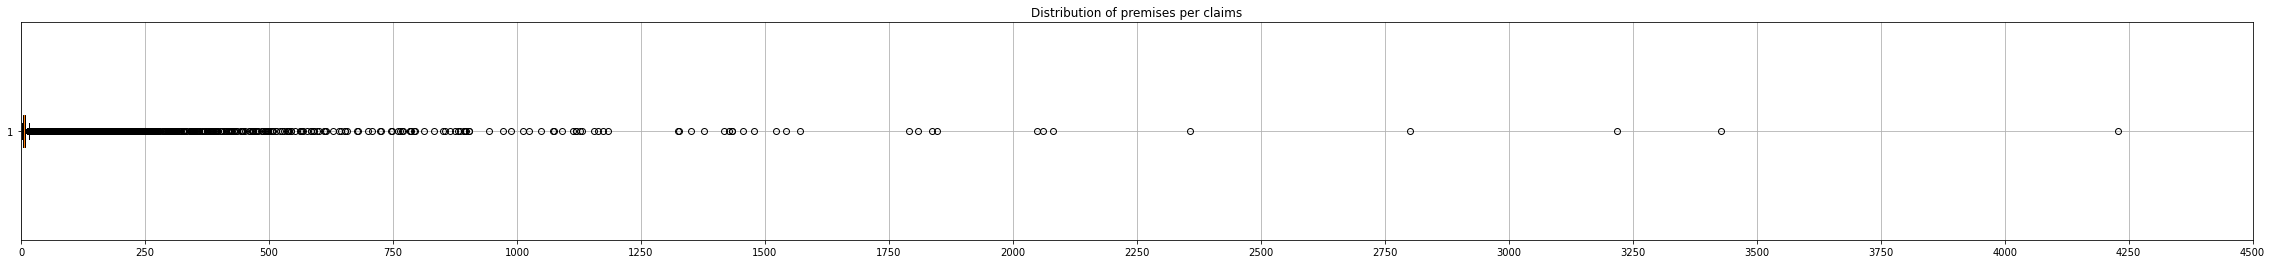

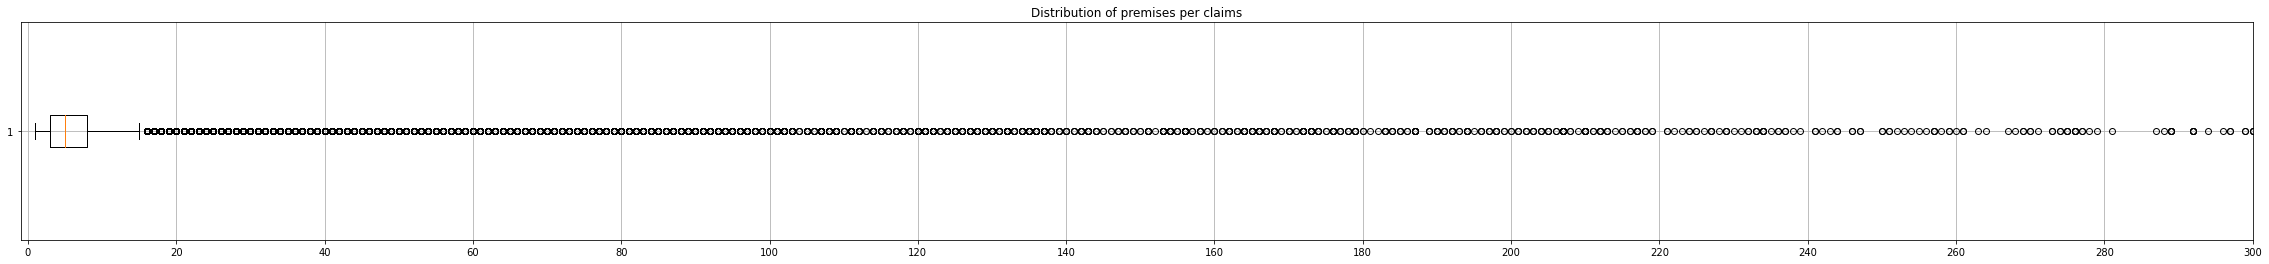

In [16]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Distribution of premises per claims')
plt.grid("both")
ax1.set_xlim([-1,4500])
ax1.xaxis.set_major_locator(plt.MultipleLocator(250))
ax1.boxplot(gb_claim_text[("premise_id","count")], vert=False)
plt.show()

fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Distribution of premises per claims')
plt.grid("both")
ax1.set_xlim([-1,300])
ax1.xaxis.set_major_locator(plt.MultipleLocator(20))
ax1.boxplot(gb_claim_text[("premise_id","count")], vert=False)
plt.show()

* Most claims have between 5 and 20 premises
* Claim with most premises has 4219 premises
* Many premises have the same text, but listed multiple times
* Some are just Kauderwelsch
* some only contain Emojis

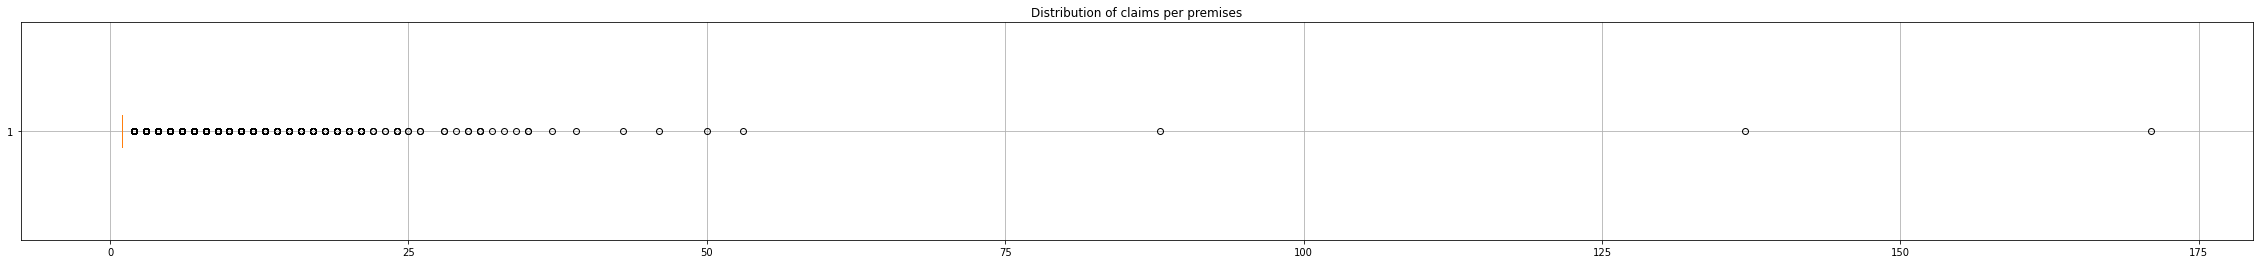

In [17]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Distribution of claims per premises')
plt.grid("both")
ax1.boxplot(gb_premise_text[("claim_id","count")], vert=False)
plt.show()

#### Distribution of Premise Length and Claim Length

* claim length

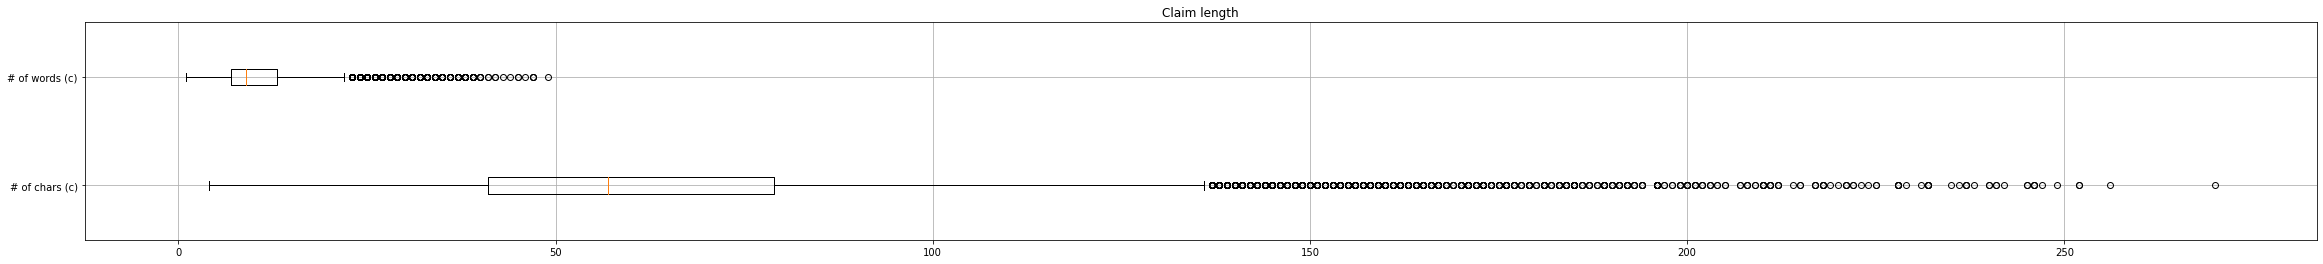

In [18]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Claim length')
plt.grid("both")
ax1.boxplot([claims_df["claims_n_chars"],claims_df["claims_n_words"]], vert=False, labels =['# of chars (c)','# of words (c)'])
plt.show()

* premise length

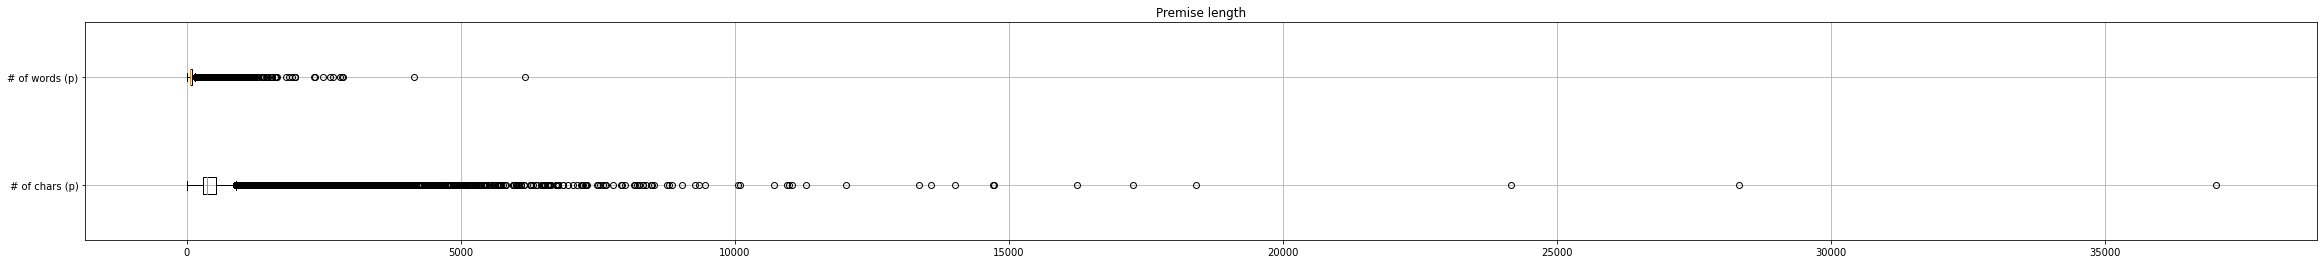

In [19]:
fig1, ax1 = plt.subplots(figsize=(40, 4))
ax1.set_title('Premise length')
plt.grid("both")
ax1.boxplot([premises_df["premises_n_chars"],premises_df["premises_n_words"]], vert=False, labels=['# of chars (p)','# of words (p)'])
plt.show()

-----------------
## Investigations
-----------------

### Claim with most premises
* Sort assignments grouped by **claim_text**

In [ ]:
ass_gb_c_text = ass_extended.groupby(['claim_text', 'claim_id'])
ass_gb_c_text.agg(['mean', 'count'])["premise_id"].sort_values(["count"], ascending=False)

* Display claim with most premises

In [ ]:
claims_df.iloc[32082]

* Find premises relevant to claim with claim_id, which has the most premises

In [ ]:
ids_p = ass_df[ass_df["claim_id"]==32082]["premise_id"]
premises_df.iloc[ids_p]

* Display all premises for that claim

In [ ]:
from IPython.display import display, HTML
display(HTML(premises_df.iloc[ids_p].to_html()))

### Assignment with most duplicates

In [ ]:
dup_test = ass_extended[ass_extended["claim_text"]=="Should violent video games be banned?"].sort_values("premise_text", ascending=False)
dup_test = dup_test[dup_test["premise_text"]=="The violent games are meant to be played by the appropriate people, if a kid got to play GTA and started to act that way in real life then its the parents fault for letting them, if the kids are at their friends house and they have that game then it is mainly the friends and their parents fault."].sort_values(["premise_id","claim_id"], ascending=False)
dup_test